In [86]:
import numpy as np

pca_input = []
for j in range(8,9):
    try:
        for i in range(10):
            path = f'weights_fedAdam/round-{j+1}-client-client{i}.npz'
            
            with np.load(path, allow_pickle=True) as data:
                # Extract arrays from .npz file
                weights = [data[key] for key in data]

            # output = weights[-2].reshape(1,128)
            # pca_input.extend(output)
            output = weights[-2].flatten()
            pca_input.append(output)
    except Exception as e:
        print(f"Error: {e}")

In [87]:
pca_input = np.array(pca_input)
pca_input.shape

(10, 256)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


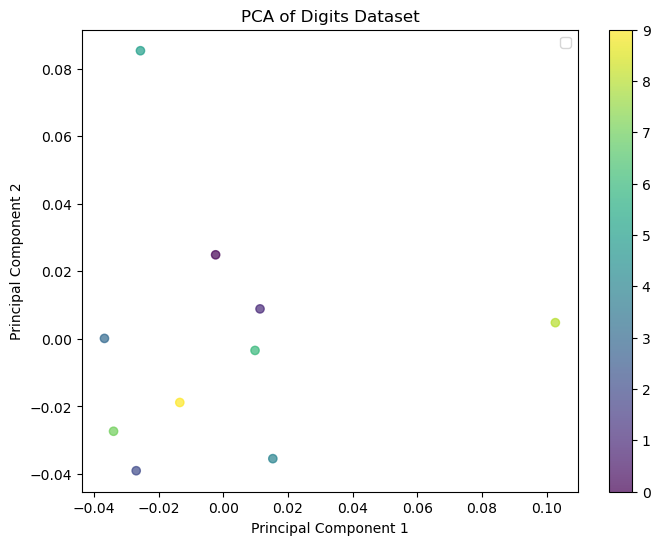

In [88]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=10)
pca_out = pca.fit_transform(pca_input)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_out[:, 0], pca_out[:, 1], c=[i for i in range(10)], cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Digits Dataset')
plt.legend()
plt.show()


d:\INSTALLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zafaryab.haider\AppData\Local\Temp\ipykernel_29920\1201562514.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_labels))


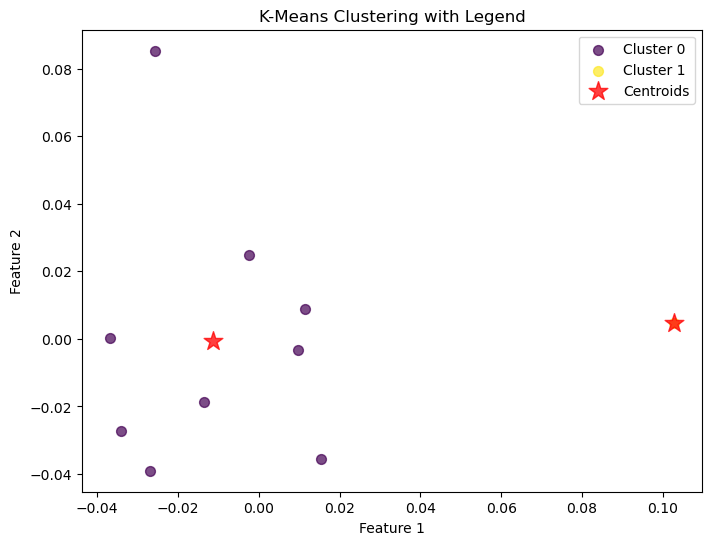

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=2, max_iter=100)
kmeans.fit(pca_out)

# 3. Get the cluster labels
labels = kmeans.labels_

# 4. Get the cluster centers
centers = kmeans.cluster_centers_


# Create a scatter plot with cluster labels
plt.figure(figsize=(8, 6))
unique_labels = np.unique(labels)
colors = plt.cm.get_cmap('viridis', len(unique_labels))

for label in unique_labels:
    plt.scatter(pca_out[labels == label, 0], pca_out[labels == label, 1], 
                color=colors(label), label=f'Cluster {label}', s=50, alpha=0.7)

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='*', label='Centroids')

# Add legend
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with Legend')
plt.show()


In [ ]:
from collections import Counter
print(Counter(labels))



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(pca_out)

# Get the cluster labels
labels = kmeans.labels_

# Measure performance
# Inertia
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

# Silhouette Score
silhouette_avg = silhouette_score(pca_out, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(pca_out, labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(pca_out, labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")

# Visualize the results
plt.figure(figsize=(8, 6))
unique_labels = np.unique(labels)
colors = plt.cm.get_cmap('viridis', len(unique_labels))

for label in unique_labels:
    plt.scatter(pca_out[labels == label, 0], pca_out[labels == label, 1], 
                color=colors(label), label=f'Cluster {label}', s=50, alpha=0.7)

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

# Add legend
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with Performance Metrics')
plt.show()


In [ ]:
# Compute the Voronoi diagram based on the cluster centers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial import Voronoi, voronoi_plot_2d


vor = Voronoi(centers)

# Plot the Voronoi diagram
plt.figure(figsize=(8, 6))
voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=2)

# Plot the clustered data points
unique_labels = np.unique(labels)
colors = plt.cm.get_cmap('viridis', len(unique_labels))

for label in unique_labels:
    plt.scatter(pca_out[labels == label, 0], pca_out[labels == label, 1], 
                color=colors(label), label=f'Cluster {label}', s=50, alpha=0.7)

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

# Add legend
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with Voronoi Diagram')
plt.show()


In [ ]:
centers = kmeans.cluster_centers_

# Ensure unique cluster centers by adding a small jitter if necessary
unique_centers = np.unique(centers, axis=0)
if len(unique_centers) < len(centers):
    centers += np.random.normal(scale=1e-4, size=centers.shape)

# Compute the Voronoi diagram based on the cluster centers
vor = Voronoi(centers)

# Plot the Voronoi diagram
plt.figure(figsize=(8, 6))
voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=2)

# Plot the clustered data points
unique_labels = np.unique(labels)
colors = plt.cm.get_cmap('viridis', len(unique_labels))

for label in unique_labels:
    plt.scatter(pca_out[labels == label, 0], pca_out[labels == label, 1], 
                color=colors(label), label=f'Cluster {label}', s=50, alpha=0.7)

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

# Add legend
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with Voronoi Diagram')
plt.show()

#### New Section: cluster of each round

d:\INSTALLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zafaryab.haider\AppData\Local\Temp\ipykernel_29920\1333385219.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', 10)


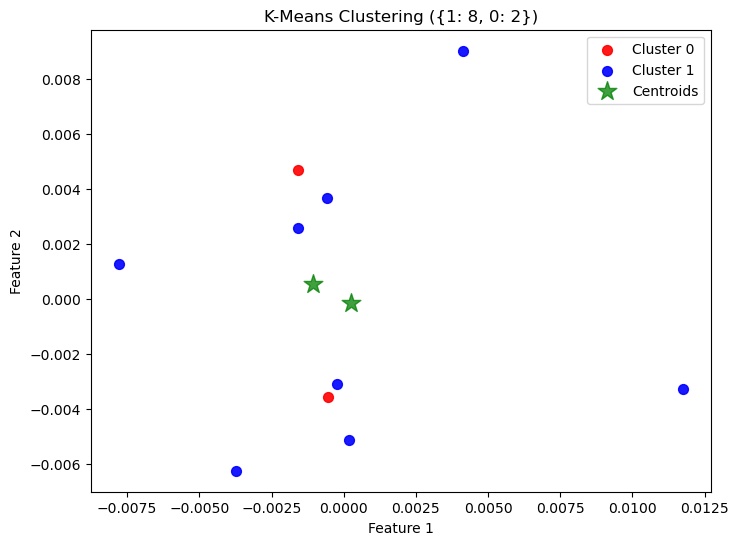

d:\INSTALLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zafaryab.haider\AppData\Local\Temp\ipykernel_29920\1333385219.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', 10)


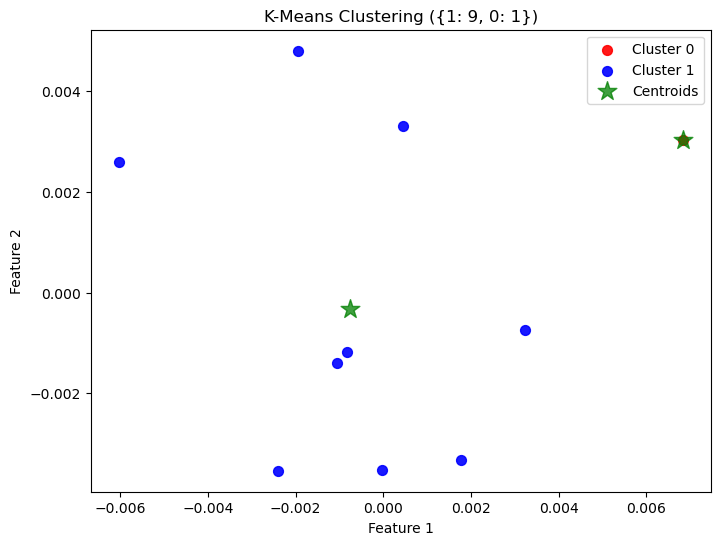

d:\INSTALLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zafaryab.haider\AppData\Local\Temp\ipykernel_29920\1333385219.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', 10)


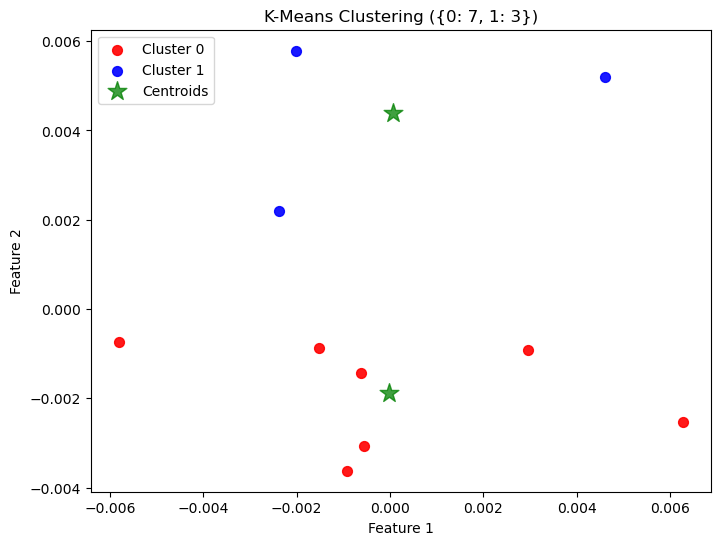

d:\INSTALLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zafaryab.haider\AppData\Local\Temp\ipykernel_29920\1333385219.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', 10)


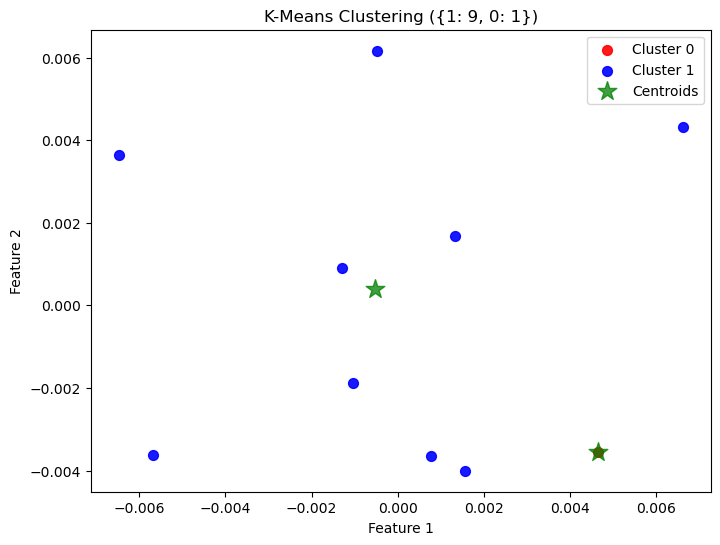

d:\INSTALLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zafaryab.haider\AppData\Local\Temp\ipykernel_29920\1333385219.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', 10)


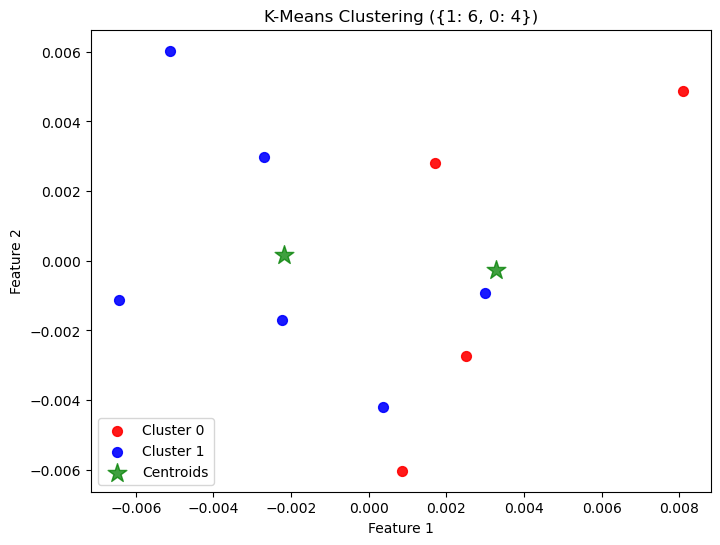

d:\INSTALLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zafaryab.haider\AppData\Local\Temp\ipykernel_29920\1333385219.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', 10)


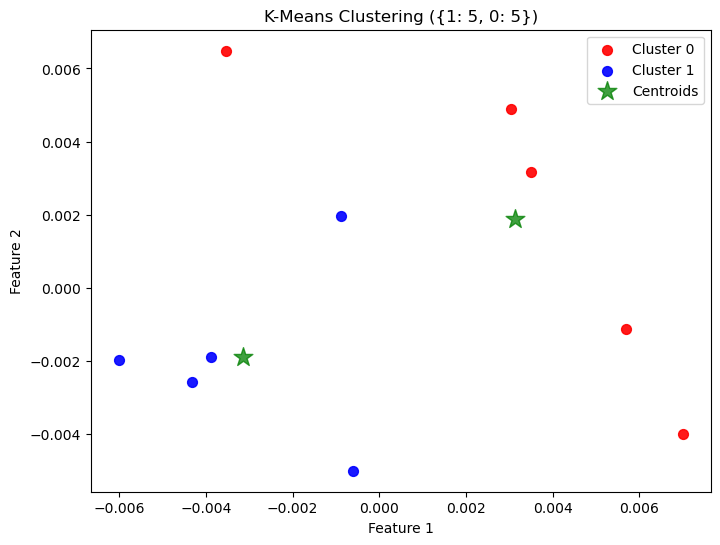

d:\INSTALLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zafaryab.haider\AppData\Local\Temp\ipykernel_29920\1333385219.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', 10)


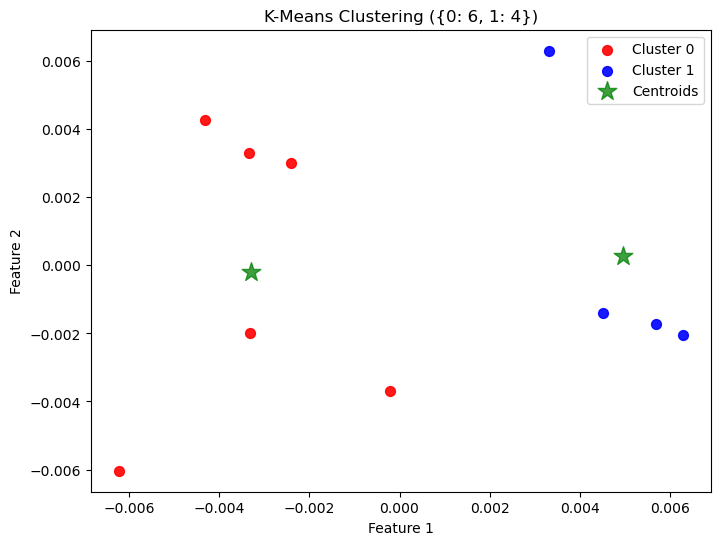

d:\INSTALLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zafaryab.haider\AppData\Local\Temp\ipykernel_29920\1333385219.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', 10)


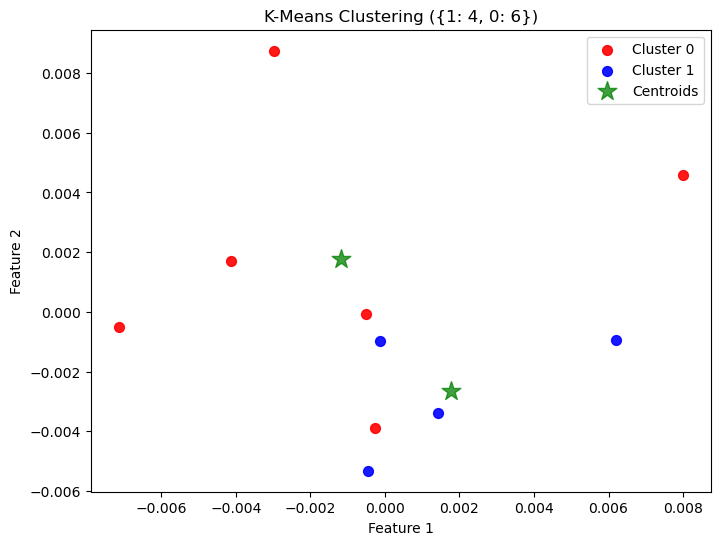

d:\INSTALLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zafaryab.haider\AppData\Local\Temp\ipykernel_29920\1333385219.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', 10)


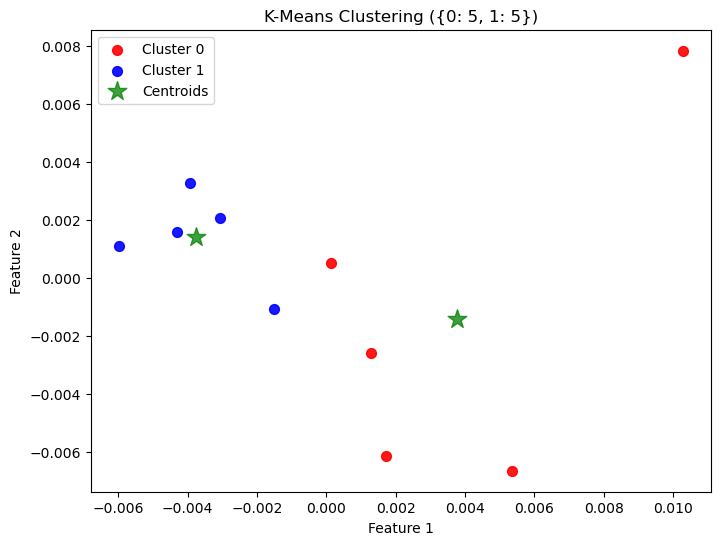

d:\INSTALLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zafaryab.haider\AppData\Local\Temp\ipykernel_29920\1333385219.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', 10)


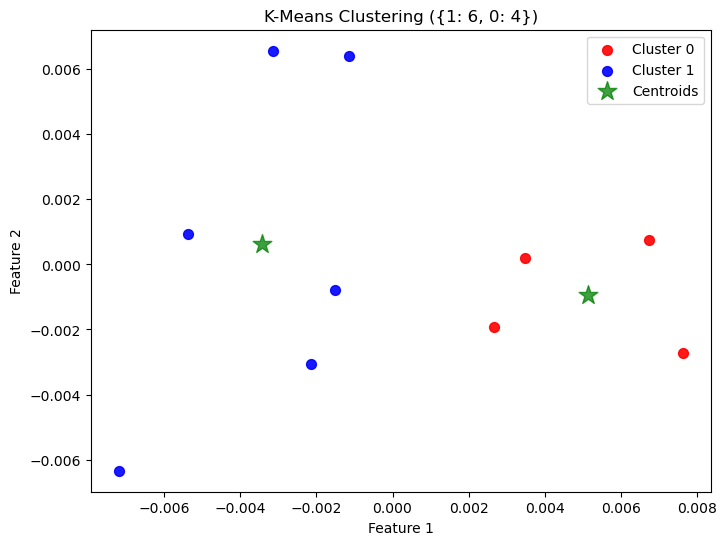

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import Counter

# Loop over each round
for j in range(10):
    pca_input = []
    try:
        for i in range(10):
            path = f'weights_fedAvg/round-{j+1}-client-client{i}.npz'
            with np.load(path, allow_pickle=True) as data:
                # Extract arrays from .npz file
                weights = [data[key] for key in data]

            output = weights[-2].reshape(1, 256)
            pca_input.extend(output)
    except Exception as e:
        print(f"Error processing round {j+1}, client {i}: {e}")
    
    if not pca_input:
        print(f"No data for round {j+1}")
        continue
    
    pca_input = np.array(pca_input)
    
    # Apply PCA
    pca = PCA(n_components=10)
    pca_out = pca.fit_transform(pca_input)
    
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=2, max_iter=100)
    kmeans.fit(pca_out)
    
    # Get the cluster labels and centers
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    # Create a scatter plot with client labels
    plt.figure(figsize=(8, 6))
    colors = plt.cm.get_cmap('viridis', 10)
    
    cluster_colors = ['red', 'blue']
    for i, label in enumerate(unique_labels):
        plt.scatter(pca_out[labels == label, 0], pca_out[labels == label, 1], 
                    color=cluster_colors[i], label=f'Cluster {label}', s=50, alpha=0.9)

    # Plot the cluster centers
    plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200, alpha=0.75, marker='*', label='Centroids')

    count = Counter(labels)
    # Add legend
    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'K-Means Clustering ({dict(count)})')
    plt.show()
